<a href="https://colab.research.google.com/github/JingRu-hi/wordle/blob/main/wordle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# begin

In [ ]:
import sys, string, re
import matplotlib.pyplot as plt

In [ ]:
# !git clone https://github.com/dwyl/english-words.git
# !git clone https://github.com/knudmoeller/wordlesolver.git
!git clone https://github.com/hakluke/wordlesolver.git data

Cloning into 'data'...
remote: Enumerating objects: 43, done.
remote: Counting objects: 100% (43/43), done.
remote: Compressing objects: 100% (35/35), done.
remote: Total 43 (delta 12), reused 27 (delta 7), pack-reused 0
Unpacking objects: 100% (43/43), done.


In [ ]:
# !ls data

README.md  wordlesolver.py  words.txt


In [ ]:
path = 'data/words.txt'

lines = []
with open(path,'r') as f:
    lines = f.read().splitlines()
f.close()
# words = [line for line in lines if len(line) == 5]
lines[:5]
# len(lines)


['cigar', 'rebut', 'sissy', 'humph', 'awake']

# solver

In [ ]:
# CCCAB
# status: 
## A: 綠色，灰色
## B: 黃
## else: 灰

sols = lines

class filter():
  def __init__(self,word,sols):
    self.word = word
    self.sols = sols

  def filterC(self,ans):
    # NOTE: setC dont contain setA
    ABlist = set(self.word).intersection(ans)
    Clist = set(self.word)-ABlist
    return [sol for sol in sols if (Clist.isdisjoint(set(sol))) and
             (all([letter in sol for letter in ABlist]))]

  def patternAB(self,ans):
    patternAB = list(self.word)
    Alist = set()
    for i in range(5):
      if list(self.word)[i]==list(ans)[i]:
        patternAB[i] 
        # Alist.add(patternAB[i])
      else:
        patternAB[i] = f'[^{patternAB[i]}]'
    patternAB = ''.join(patternAB)
    patternAB = f'^{patternAB}$'
    return re.compile(patternAB)


  def filterABC(self,ans):
    patternAB = self.patternAB(ans)
    ABlist = set(self.word).intersection(ans)
    sols = self.filterC(ans)
    sols_AB = [re.match(patternAB,sol).group() for sol in sols if
               (re.match(patternAB,sol) is not None)]
    return sols_AB

test = ['aaara','faara','aaarr']

In [ ]:
set([1,2,3]).issubset(set([1,5,2,3]))

True

In [ ]:
# CCCAB
# status: 
## A: 綠色，灰色
## B: 黃
## else: 灰

sols = lines

class filter():
  def __init__(self,word,sols):
    self.word = word
    self.sols = sols

  def filterChar(self,ans):
    ABlist = set(self.word).intersection(ans)
    Clist = set(self.word)-ABlist
    return [sol for sol in sols if (Clist.isdisjoint(set(sol))) and
             (ABlist.issubset(set(sol)))]

  def patternPos(self,ans):
    patternPos = list(self.word)
    # Alist = set()
    for i in range(5):
      if list(self.word)[i]==list(ans)[i]:
        patternPos[i] 
        # Alist.add(patternPos[i])
      else:
        patternPos[i] = f'[^{patternPos[i]}]'
    patternPos = ''.join(patternPos)
    patternPos = f'^{patternPos}$'
    return re.compile(patternPos)


  def filterPos(self,ans):
    patternPos = self.patternPos(ans)
    ABlist = set(self.word).intersection(ans)
    sols = self.filterChar(ans)
    solsPos = [re.match(patternPos,sol).group() for sol in sols if
               (re.match(patternPos,sol) is not None)]
    return solsPos

In [ ]:
ans = 'shave'

sols = lines
word = 'raile'
while len(sols)!=1:
  sols = filter(word ,sols).filterPos(ans)
  word = sols[0]
  print(word)
  print(len(sols))

awake
43
evade
20
suave
4
stave
2
shave
1


expected possible solutions: 61.33088552915767


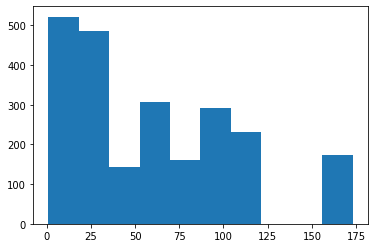

In [ ]:

# CCCAB
# status: 
## A: 綠色，灰色
## B: 黃
## else: 灰
word = 'raile'

sols = lines
len_1 = []
tmp = filter(word ,sols)
for ans in lines:
  tmp_sols = tmp.filterABC(ans)
  # print(tmp.filterABC(ans))
  len_1.append(len(tmp_sols))

print(f'expected possible solutions: {sum(len_1)/len(len_1)}')

plt.hist(len_1)
plt.show()

In [ ]:
word = 'raile'
sols = lines
sols.remove(word)
# len_1 = []

initialObj = filter(word ,sols)
for ans in sols:
  tmp_sols = initialObj.filterABC(ans)
  # len_1.append(len(tmp_sols))
  for second in tmp_sols:
    tmp_sols2 = tmp_sols

    secondObj = filter(second ,tmp_sols2)
    tmp_sols2 = secondObj.filterABC(ans)


print(f'expected possible solutions: {sum(len_1)/len(len_1)}')

plt.hist(len_1)
plt.show()

# end

In [ ]:

# def get_candidates(words, present, not_present, pattern):
#     return [word for word in words if
#             all([letter in word for letter in present]) and
#             not any([letter in word for letter in not_present]) and
#             pattern.match(word)
#             ]



# # set parameters
# present = [char for char in 'ae'] # letters that we know are in the word
# # present = set(word).intersection(ans)
# not_present = [char for char in 'ris']  # letters we know are not in the word
# # not_present = set(word)-present
# pattern = re.compile('....e')

# # filter words with all() and not any()
# candidates = get_candidates(words, present, not_present, pattern)
# print(sorted(candidates))
# print(len(candidates))


In [ ]:
distribution={}

# guess = initial_word
candidates = lines[:] 
count = 0
total_depth = 0
criterions=lines[:]

def recur(guess, ans, candidates, d=0):
  if len(candidates) == 1:
    global count, total_depth
    count +=1
    total_depth +=d
  else:
    d+=1
    candidates = filter(guess, candidates).filterPos(ans) 
    for c in candidates:
          recur(c, ans, candidates, d=d)  # take every word in the candidates
  return total_depth


# given: initial_word, ans
for initial_word in lines:
  count = 0
  criterions= lines
  for ans in lines:
    total_depth = 0
    count, total_depth = recur(initial_word, ans, candidates, criterions, d=0)
  distribution[initial_word] = total_depth/count

# Goal:find the minimum depth in the distribution of words

In [1]:
# from collections import defaultdict
# d = defaultdict(dict)
# d["a"]['b']

In [ ]:


distribution = {}
guess = initial_word
candidates = word_dictionary[:]  # 辭典
count = 0
total_depth = 0
criterions=[criterion_A, criterion_B, criterion_C] 

def recur(guess, ans, candidates, criterions, d=0):
    if len (candidates) == 1:
        count +=1
        total_depth +=d
    else:
        d+=1
        candidates, criterions = filter(guess, ans, criterions)
        for c in candidates:
             recur(c, ans, candidates, criterions, d=d)  # take every word in the candidates

for word in word_dictionary:
    count = 0
    total_depth = 0
    criterions=[criterion_A, criterion_B, criterion_C] 
    for ans in word_dictionary:
        recur(word, ans, candidates, criterions, d=0)
    distribution[word] = total_depth/count
